<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793108/blob/main/Actividad4regularizacion_A01793108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Desarrollo preguntas para métodos de regularización


**Pregunta A:**
  *  Con base a la exactitud y desviación estándar de cada modelo mostrados en los resultados anteriores, ¿qué puedes decir del modelo generado? ¿Ayudan en este caso el uso de las técnicas de regularización para obtener un mejor modelo?

**Respuesta:**

Los resultados obtenidos por las regularizaciones no parecen ser ampliamente superiores a la regresión logística, dado que casi todos los modelos alcanzan un ajuste cercano al 87%, menos la Elastic Net con 86%. Por lo tanto, parece ser que no existe un alto sesgo en la predicción de personas a quienes se le ha entregado una TC con las metodologías usadas. 

En cuanto a la desviación estandar esta tiende a estar alrededor del 5%. Por lo que parece que los datos no tienen una alta varianza.

En conclusión los modelos al **parecer** muestran un buen rendimiento en el entrenamiento y validación o la contrucción.








**Pregunta B:**
  *  Realiza ajustes a los argumentos de algunos de los modelos y observa si puedes obtener un mejor resultado, al menos en cuanto a su promedio general.

**Respuesta:**

Al parecer con las modificaciones realizadas no existe una variación abrupta en los resultados, no se pude elevear el nivel de ajuste por encima del 87% o reducirse por debajo del 86%. Lo propio sucede con la varianza.


**Pregunta C:**
  *  ¿Qué podrías concluir al respecto?

**Respuesta:**

Probablemente sea necesario aplicar metodologías de optimización para modificar los niveles de ajuste, estimando los hiperparámetros de manera más adecuada. O simplemente son los mejores que se pueden alcanzar, dado la distruibución de la información disponible.

Una conclusión general puede ser que debido a que los valores de los paramétros no tienen a ajustarse demasiado o ser altos y todas las variables son relevantes para predecir la variable objetivo, tanto los modelos no regularizados y los que sí tienen a ser parecidos.

**Pregunta D:**
  *  ¿Se obtuvo un un buen ajuste en alguno de los modelos?

**Respuesta:**

Se podría considerar que se tiene un ajuste adecuado al alcanzar un valor que ronda por el 87% y una variación entre modelos de 5% y 6%. Por lo que, se puede concluir que se tienen modelos con poco sesgo y baja vaianza en los datos de estudio.


**Pregunta E:**
  *  ¿Están subentrenados?

**Respuesta:**

Parece ser que los modelos no están subentrenados por el ajuste que presentan los modelos con los datos de validación. Sin embargo, aún nos falta analizar que resultados se obtienen al ver su rendimiento con el conjunto de testing.

**Pregunta F:**
  *  ¿Están sobreentrenados?

**Respuesta:**

Parece ser que los modelos no están sobreentrenados dado que no existe un ajuste perfecto a los datos qus superen el 90% en la precisión.

**Pregunta G:**
* ¿Qué otra información necesitarías para responder estas preguntas?

**Respuesta:**

Tendríamos que evaluar su rendimiento en los datos de testing. Incluso ver criterios como precision o accuracy.


# 2. Apuntes código de clase y **Apuntes para responder la tarea de la semana**

Regresion logística y metodos de regularización:



*  L1 Lasso
*  L2 Ridge
*  L12 Elastic net



Los altos valores de *beta* se producen cuando los modelos pasan a sobreajustarse a los datos de entrenamiento, lo cual, se volverá un problema cuando se lo utilice en el conjunto de prueba y validación, simplemente no predecirá bien.

Es por ello que "regularizar es necesario"

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [77]:
# Definimos nuestras 3 variables en el intervalo -1.3 a 3.5 como sigue:

x1 = np.arange(-1.3, 3.5, .125)     # factor/variable lineal
x2 = x1*x1                          # factor cuadrático
x3 = x1*x1*x1                       # factor cúbico

In [78]:
# Y definimos nuestra matriz de datos de entrada X como un DataFrame de Pandas:
# La matriz X estará formada por las columnas 1, 2 y 3 con los factores lineal,
# cuadrático y cúbico, respectivamente:

w = np.concatenate((np.vstack(x1),np.vstack(x2),np.vstack(x3)), axis=1)
print(x1.shape)
print(np.vstack(x1).shape)
print(w.shape)

X = pd.DataFrame(w, columns=['x1','x2','x3'])
X.head()

(39,)
(39, 1)
(39, 3)


,x1,x2,x3
0,-1.300,1.690000,-2.197000
1,-1.175,1.380625,-1.622234
2,-1.050,1.102500,-1.157625
3,-0.925,0.855625,-0.791453
4,-0.800,0.640000,-0.512000


In [79]:
# Definimos los siguientes pesos de manera arbitraria y que establece una relación
# polinomial cúbica en nuestra variable de salida Y:

w0 = 190
### estos seran los pesos que necesitaran de regularizacion 
w1= -85/3
w2=-165
w3=160/3

print('Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:')
print('lineal: %.2f, cuadrático: %.2f cubo: %.2f' % (w1, w2, w3))

Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:
lineal: -28.33, cuadrático: -165.00 cubo: 53.33


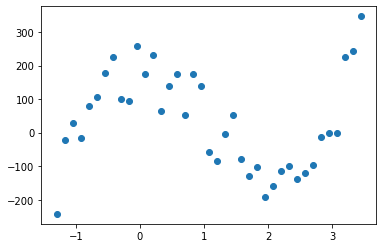

In [80]:
# Definimos nuestra variable de salida con algo de ruido para que nuestro problema
# no se reduzca simplemente a un problema de interpolación de puntos:

random.seed(1)
yreal = []
for x in x1:
  noise=200*(random.random() -0.5)
  cc = w3*np.power(x,3) + w2*np.power(x,2) + w1*x + w0 + noise
  yreal.append(cc)
  
  
plt.scatter(x1,yreal)
plt.show()

In [81]:
# Definamos 4 modelos: el de regresión lineal múltiple (RLM); de RLM con 
# regularización L1 (lasso); de RLM con regularización L2 (ridge) y
# RLM con regularización conjunta L1 y L2 (elastic-net):  

modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha=30)))  
modelos.append(('RIDGE', Ridge(alpha=300)))  
 ### trade-off entre no dejar que los valores caigan hasta 0 por lasso
 ### esto ayuda ridge
modelos.append(('EN', ElasticNet(alpha=1, l1_ratio=.5)))


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2
yhat12 = []  # predicciones del RLM con regularización L1 y L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(yreal))
  yhat = mm.predict(X)
  
  print(mm.intercept_)   # por si deseas conocer w0.
  print(mm.coef_)       # despleguemos los pesos obtenidos

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')
  else:
    yhat12.append(yhat)
# -28.33, cuadrático: -165.00 cubo: 53.33

LR:
194.91638384474888
[ -40.14979812 -179.70350006   58.72754395]


LASSO:
117.13069427863499
[  -0.         -102.25253563   31.42721669]


RIDGE:
37.019116965127644
[-5.0707571  -8.94767549  4.28942146]


EN:
105.48167999947967
[-32.10655264 -79.34645456  28.06434904]


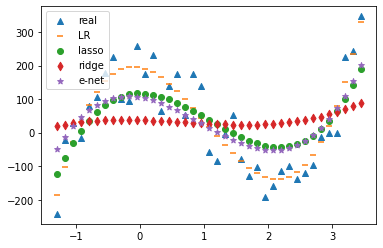

In [82]:
plt.scatter(x1, np.ravel(yreal), marker='^', label='real')  

plt.scatter(x1, np.ravel(yhat0), marker='_', label='LR')  
plt.scatter(x1, np.ravel(yhat1), marker='o', label='lasso')  
plt.scatter(x1, np.ravel(yhat2), marker='d', label='ridge')  
plt.scatter(x1, np.ravel(yhat12), marker='*', label='e-net')

plt.legend(loc=2)
plt.show()

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [84]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [85]:
# Por ejemplo, veamos cómo se distribuyen los niveles en el caso del factor A4:
## al menos deben tener un 5% la categoria para que se puedea inferir sobre ese nivel
print(data['A4'].value_counts())
print(data['A5'].value_counts())


2    525
1    163
3      2
Name: A4, dtype: int64
8     146
11     78
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
2      30
10     25
5      10
12      3
Name: A5, dtype: int64


In [86]:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [87]:
# Ahora sí, definamos nuestras variables de entrada y de salida, 
# observa que ambas son DataFrames de Pandas:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1]     # También puede ser: data[['class']

In [88]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(552, 14) : dimensión de datos de entrada para entrenamiento y validación
(138, 14) : dimensión de datos de entrada para prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


In [89]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

In [90]:
# definicion de modelos a entrenar
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')
  
  return modelos, nombres

In [91]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> LR: 0.861 (0.039)
>> DT: 0.812 (0.053)
>> MLP: 0.839 (0.035)
>> SVM: 0.850 (0.041)
>> kNN: 0.791 (0.040)


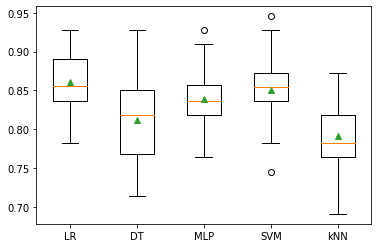

In [92]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

Regresión Logística con regularizaciones 
L
1
 y 
L
2
:

In [93]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=20, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=20, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.9, solver='saga', max_iter=4000, C=20, random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.867 (0.050)
>> RIDGE 0.868 (0.049)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

>> EN 0.868 (0.048)


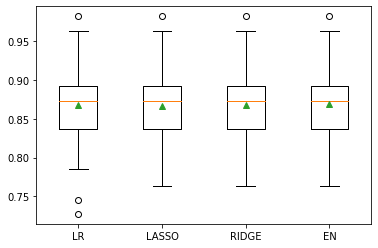

In [94]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [99]:
# RIDGE - métrica L2:

modelo = LogisticRegression(penalty='l2', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,300.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='accuracy')

In [100]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8688181818181817
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 300.0, 'solver': 'saga'}
Métrica utilizada: accuracy
